In [8]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/prava/Downloads/Sadhuko/SEM5/ML/data.csv"
df = pd.read_csv(file_path)

# Drop the 'id' and 'Unnamed: 32' columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

# Encode the target variable ('diagnosis') - M (Malignant) as 1, B (Benign) as 0
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cleaned['diagnosis'] = label_encoder.fit_transform(df_cleaned['diagnosis'])

# Display the first few rows of the cleaned dataset
df_cleaned.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# A1

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model using confusion matrix, precision, recall, and F1-score for both training and test data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

class_report_train = classification_report(y_train, y_train_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("Training Data Confusion Matrix:")
print(conf_matrix_train)
print("\nTraining Data Classification Report:")
print(class_report_train)

print("\nTesting Data Confusion Matrix:")
print(conf_matrix_test)
print("\nTesting Data Classification Report:")
print(class_report_test)


Training Data Confusion Matrix:
[[286   0]
 [  0 169]]

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Testing Data Confusion Matrix:
[[70  1]
 [ 3 40]]

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# A2


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume you've selected two features and the target variable
X = df_cleaned[['radius_mean', 'texture_mean']]  # Example features
y = df_cleaned['diagnosis']  # Target variable (regression context assumed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_true = y_test

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)

# Calculate R² Score
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")


MSE: 0.09187350714566335
RMSE: 0.3031064287435411
MAPE: 555069134958509.0
R²: 0.6089131677481032


# A3

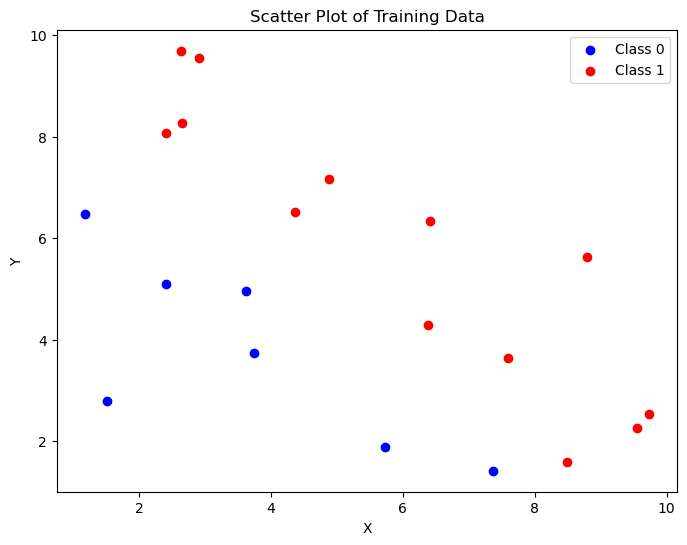

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for X and Y between 1 and 10
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)

# Assign classes based on the sum of X and Y
classes = np.where(X_train + Y_train > 10, 1, 0)  # Class 1 (Red) and Class 0 (Blue)

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', label='Class 0')
plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.show()

# A4

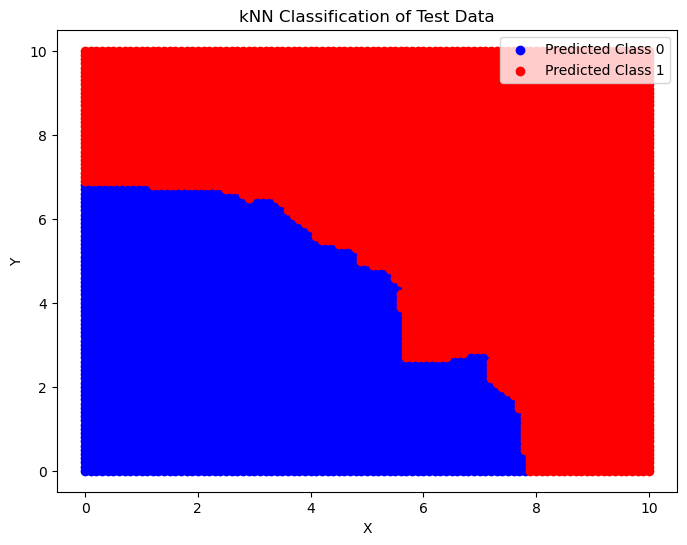

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Generate test data
X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
X_test = X_test.ravel()
Y_test = Y_test.ravel()

# Combine X and Y into a single feature array for training
X_train_combined = np.vstack((X_train, Y_train)).T
X_test_combined = np.vstack((X_test, Y_test)).T

# Fit kNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_combined, classes)

# Predict the class for the test data
predictions = knn.predict(X_test_combined)

# Plot the test data with predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test[predictions == 0], Y_test[predictions == 0], color='blue', label='Predicted Class 0')
plt.scatter(X_test[predictions == 1], Y_test[predictions == 1], color='red', label='Predicted Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.show()


# A5

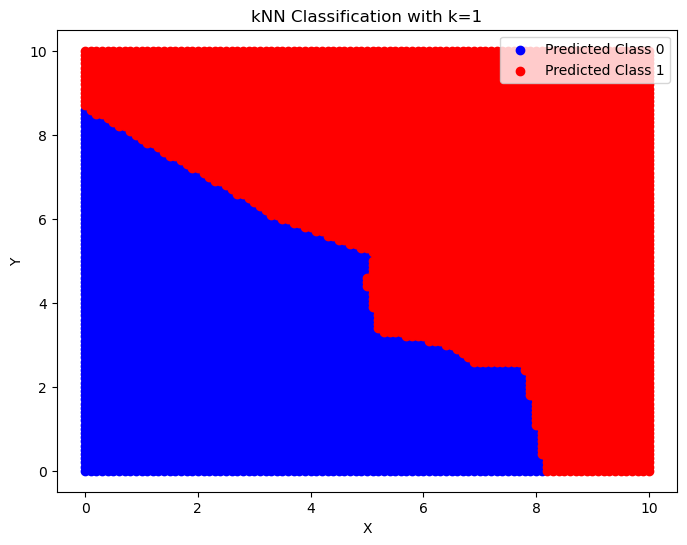

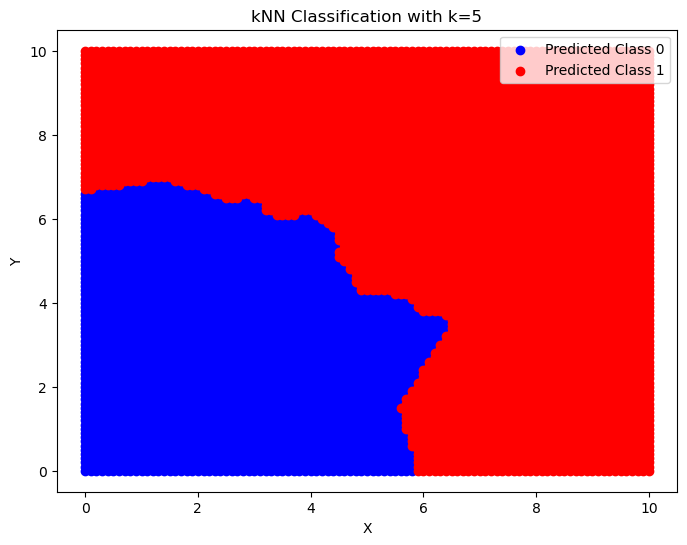

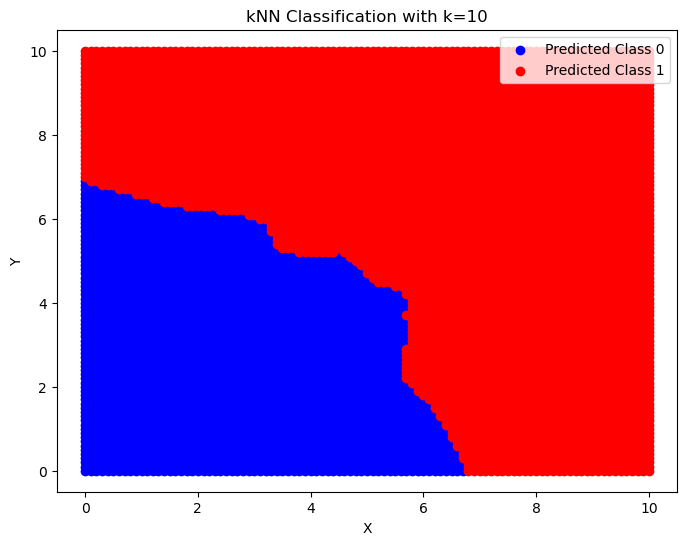

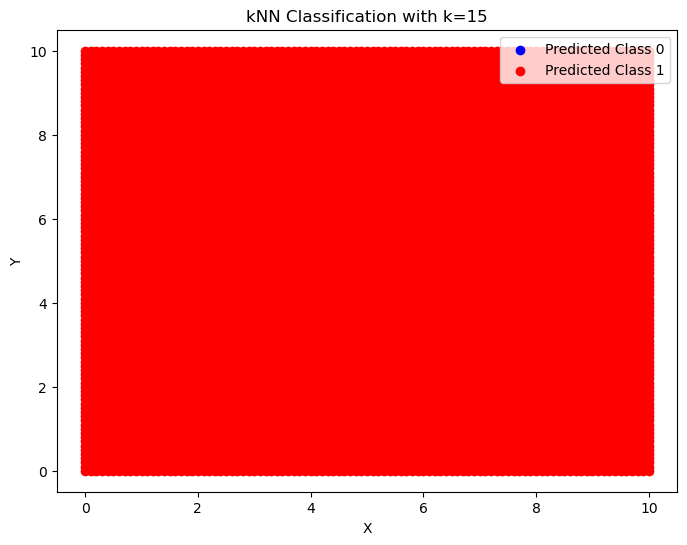

In [16]:
# Define a list of k values to iterate through
k_values = [1, 5, 10, 15]

# Iterate through the different k values and plot the results
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_combined, classes)
    predictions = knn.predict(X_test_combined)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[predictions == 0], Y_test[predictions == 0], color='blue', label='Predicted Class 0')
    plt.scatter(X_test[predictions == 1], Y_test[predictions == 1], color='red', label='Predicted Class 1')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'kNN Classification with k={k}')
    plt.legend()
    plt.show()


# A6

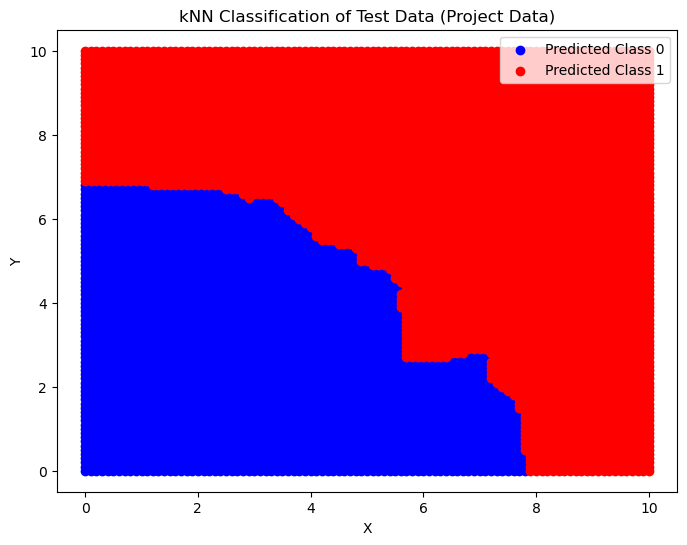

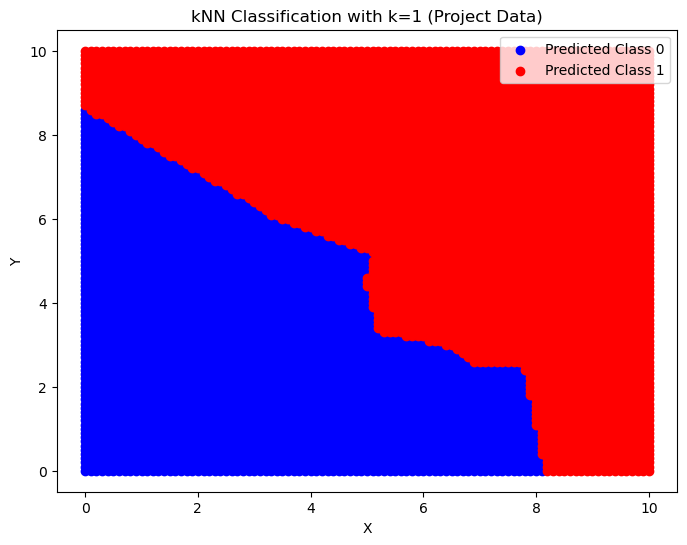

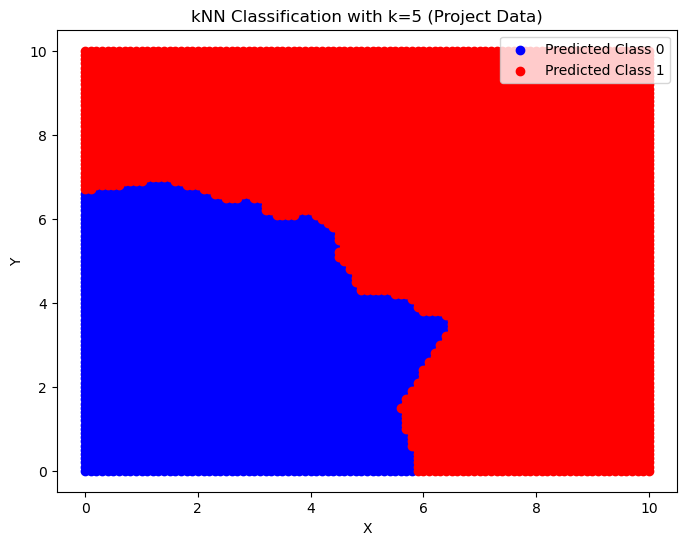

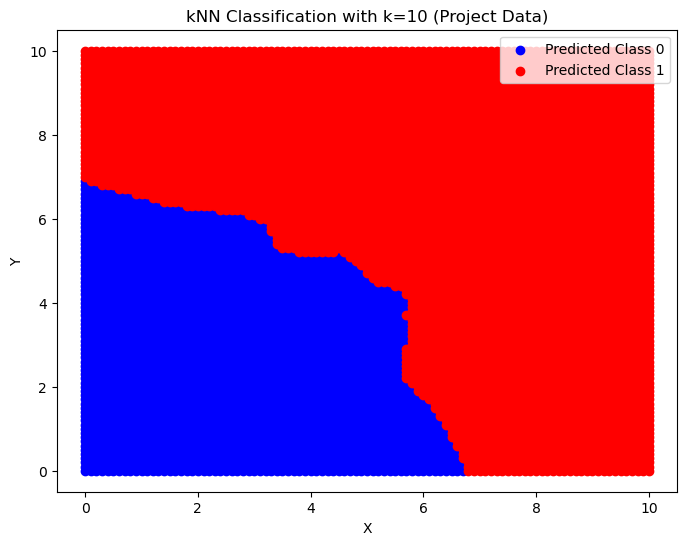

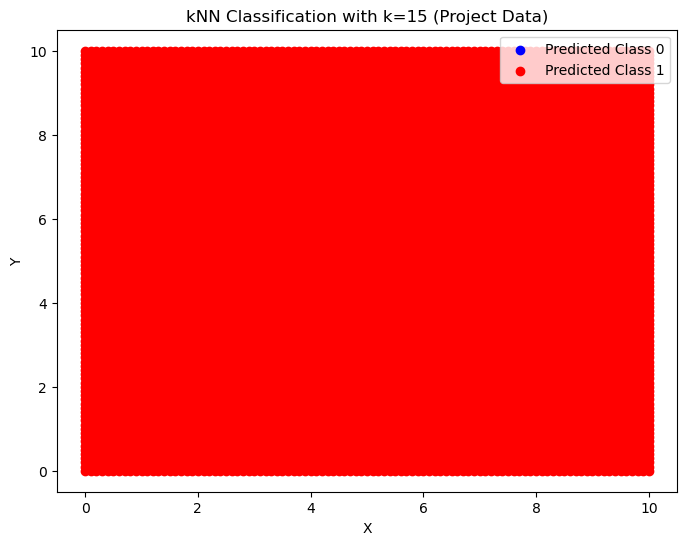

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Step 1: Select two features and the target variable from your dataset
selected_features = ['radius_mean', 'texture_mean']  # Replace with any two features
X = df_cleaned[selected_features]
y = df_cleaned['diagnosis']  # Target variable (0 or 1)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Generate training data points
np.random.seed(42)
X_train_points = np.random.uniform(1, 10, 20)
Y_train_points = np.random.uniform(1, 10, 20)

# Assign classes based on a simple rule (this is arbitrary; adjust as needed)
classes = np.where(X_train_points + Y_train_points > 10, 1, 0)  # Class 1 (Red) and Class 0 (Blue)

# Combine X_train and Y_train into a single feature array
X_train_combined = np.vstack((X_train_points, Y_train_points)).T

# Step 4: Generate test data and classify using kNN (k = 3)
X_test_grid = np.arange(0, 10.1, 0.1)
Y_test_grid = np.arange(0, 10.1, 0.1)
X_test_grid, Y_test_grid = np.meshgrid(X_test_grid, Y_test_grid)
X_test_combined = np.vstack((X_test_grid.ravel(), Y_test_grid.ravel())).T

# Fit kNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_combined, classes)

# Predict the class for the test data
predictions = knn.predict(X_test_combined)

# Plot the test data with predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test_combined[:, 0][predictions == 0], X_test_combined[:, 1][predictions == 0], color='blue', label='Predicted Class 0')
plt.scatter(X_test_combined[:, 0][predictions == 1], X_test_combined[:, 1][predictions == 1], color='red', label='Predicted Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('kNN Classification of Test Data (Project Data)')
plt.legend()
plt.show()

# Step 5: Repeat the kNN classification for different values of k
k_values = [1, 5, 10, 15]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_combined, classes)
    predictions = knn.predict(X_test_combined)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_combined[:, 0][predictions == 0], X_test_combined[:, 1][predictions == 0], color='blue', label='Predicted Class 0')
    plt.scatter(X_test_combined[:, 0][predictions == 1], X_test_combined[:, 1][predictions == 1], color='red', label='Predicted Class 1')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'kNN Classification with k={k} (Project Data)')
    plt.legend()
    plt.show()


# A7

In [18]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

# Step 1: Select features and target variable
selected_features = ['radius_mean', 'texture_mean']  # Replace with any two features from your dataset
X = df_cleaned[selected_features]
y = df_cleaned['diagnosis']  # Target variable (0 or 1)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the kNN model
knn = KNeighborsClassifier()

# Step 4: Define the parameter grid or distribution for 'k'
param_grid = {'n_neighbors': np.arange(1, 31)}  # k values from 1 to 30

# Step 5: Perform GridSearchCV to find the best k value
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k value found using GridSearchCV: {best_k}")
print(f"Best cross-validated accuracy score: {best_score}")

# Step 6: Train the kNN model with the best k and evaluate on the test set
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
test_accuracy = knn_best.score(X_test, y_test)

print(f"Test set accuracy with best k ({best_k}): {test_accuracy}")

# Optionally, you can also use RandomizedSearchCV if you want a randomized search instead of exhaustive search
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and best score from RandomizedSearchCV
best_k_random = random_search.best_params_['n_neighbors']
best_score_random = random_search.best_score_

print(f"Best k value found using RandomizedSearchCV: {best_k_random}")
print(f"Best cross-validated accuracy score (randomized): {best_score_random}")

# Train and evaluate the model from RandomizedSearchCV
knn_best_random = KNeighborsClassifier(n_neighbors=best_k_random)
knn_best_random.fit(X_train, y_train)
test_accuracy_random = knn_best_random.score(X_test, y_test)

print(f"Test set accuracy with best k from RandomizedSearchCV ({best_k_random}): {test_accuracy_random}")


Best k value found using GridSearchCV: 18
Best cross-validated accuracy score: 0.8989010989010989
Test set accuracy with best k (18): 0.9298245614035088
Best k value found using RandomizedSearchCV: 18
Best cross-validated accuracy score (randomized): 0.8989010989010989
Test set accuracy with best k from RandomizedSearchCV (18): 0.9298245614035088
